<a href="https://colab.research.google.com/github/mikislin/summer20-Intro-python/blob/master/09_Data_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

please download and add to working folder the following files 
https://drive.google.com/file/d/1ZIeLfx5oSxTBEVxguS7EQCYsSFTa0e5m/view?usp=sharing, https://drive.google.com/file/d/1gzpncY8IWrSRtpSW5TqwhusyERZefLbc/view?usp=sharing, https://drive.google.com/file/d/1sC9dmCFjEZWo4-Zos0MJGXisfFe5QIEK/view?usp=sharing

In [19]:
import glob 

filenames = glob.glob('*_info.mat')
print(filenames)

['OFT-0000-00_box_aligned_info.mat', 'OFT-0060-00_box_aligned_info.mat', 'OFT-0062-00_box_aligned_info.mat']


In [21]:
import scipy.io
tempfile = scipy.io.loadmat(filenames[0])

In [22]:
tempfile.keys()

dict_keys(['__header__', '__version__', '__globals__', 'runDataBox', 'mouseInfo', 'parametersBox'])

In [23]:
tempfile.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Oct 26 18:29:51 2018'), ('__version__', '1.0'), ('__globals__', []), ('runDataBox', array([[(array([[14, 22, 26, ..., 12, 13, 14],
       [ 9, 15, 23, ..., 12, 13, 18],
       [ 5,  9, 16, ..., 13, 16, 23],
       ...,
       [ 5,  6,  4, ..., 12, 12, 12],
       [ 5,  5,  5, ..., 11, 12, 11],
       [ 5,  4,  4, ..., 13, 12, 12]], dtype=uint8), array(['/tigress/klibaite/FULL_MOUSE_OFT/2018-07-OFT/day1/OFT-0000-00.h5'],
      dtype='<U64'), array(['/tigress/SHAEVITZ/klibaite/mouseBOX_day1/OFT-0000-00_box.h5'],
      dtype='<U59'), array([[(array(['/tigress/klibaite/FULL_MOUSE_OFT/2018-07-OFT/day1/OFT-0000-00.h5'],
      dtype='<U64'), array(['pg0'], dtype='<U3'), array([[(array([], dtype='<U1'), array(['H5T_INTEGER'], dtype='<U11'), array(['H5T_STD_U8LE'], dtype='<U12'), array([[1]], dtype=uint8), array([], shape=(1, 0), dtype=float64))]],
      dtype=[('Name', 'O'), ('Class', 'O'), ('Type', 'O'), ('Si

In [24]:
tempfile['runDataBox'].shape

(1, 1)

In [27]:
for i in range(len(tempfile['runDataBox'][0,0])):
  print(tempfile['runDataBox'][0,0][i].shape, tempfile['runDataBox'][0,0][i].dtype)

(1280, 1024) uint8
(1,) <U64
(1,) <U59
(1, 1) [('Filename', 'O'), ('Name', 'O'), ('Datatype', 'O'), ('Dataspace', 'O'), ('ChunkSize', 'O'), ('FillValue', 'O'), ('Filters', 'O'), ('Attributes', 'O')]
(1, 1) uint16
(5, 2) uint16
(1, 2) uint16
(1,) <U69
(1,) <U71


NameError: ignored

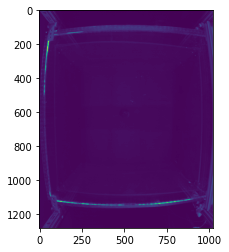

In [94]:
import matplotlib.pyplot as plt

plt.imshow(tempfile['runDataBox'][0,0][0])
plt.plot([max_coor_x, max_coor_y, min_coor_x, min_coor_y],[ 0, 300, 300, 0])
plt.show()


In [29]:
for i in range(len(tempfile['mouseInfo'][0,0])):
  print(tempfile['mouseInfo'][0,0][i].shape, tempfile['mouseInfo'][0,0][i].dtype)

(47999, 2) float64
(47999, 2) float64
(47999, 1) float64


In [33]:
47999/(20*60)

39.99916666666667

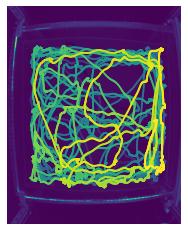

In [95]:
import numpy as np
fps = 40
t = np.arange(0,tempfile['mouseInfo'][0,0][0].shape[0]*1/fps, 1/fps)
plt.imshow(tempfile['runDataBox'][0,0][0])

plt.scatter(tempfile['mouseInfo'][0,0][0][:,0],
            tempfile['mouseInfo'][0,0][0][:,1], c=t, s=1)
plt.axis('off')
plt.show()

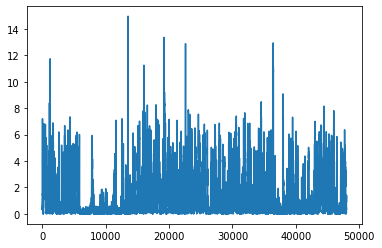

In [39]:
x = tempfile['mouseInfo'][0,0][0]
dists = np.sqrt(np.sum((x[:-1,:]-x[1:,:])**2,axis=1))
plt.plot(dists)


In [41]:
total_dist = np.sum(dists)
print(total_dist/20)

3348.1565716986734


<function matplotlib.pyplot.show>

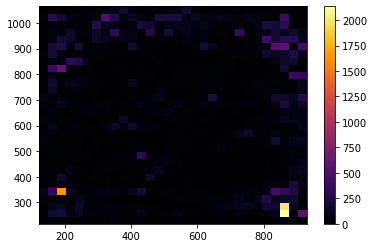

In [44]:
plt.hist2d(x[:,0],x[:,1], bins=30, cmap='inferno')
plt.colorbar()
plt.show

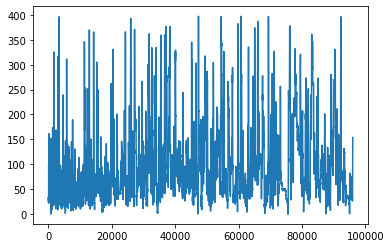

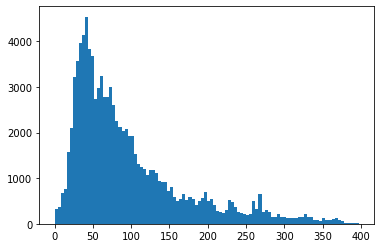

In [93]:
min_coor_x, min_coor_y = np.min(x, axis=0)
max_coor_x, man_coor_y = np.max(x, axis=0)
min_dist_from_wall = np.min(np.hstack((x-np.min(x,axis=0),
                                      np.max(x, axis = 0)-x)),axis=1)
plt.plot(min_dist_from_wall)
plt.show()
plt.hist(min_dist_from_wall, 100)
plt.show()

In [52]:
INNER = 100
inner = min_dist_from_wall >= INNER 
outer = min_dist_from_wall <= INNER

print(np.sum(inner)/fps, np.sum(outer)/fps, (np.sum(inner)/fps)/(np.sum(outer)/fps))

333.125 866.85 0.38429370710042104


In [74]:
database = {'id': [],
            'filename': [],
            'medIm':[],
            'centroid':[],
            'total_distance':[],
            'inner_time':[],
            'outer_time':[]}

In [53]:
filenames

['OFT-0000-00_box_aligned_info.mat',
 'OFT-0060-00_box_aligned_info.mat',
 'OFT-0062-00_box_aligned_info.mat']

In [75]:
i = 0
for filename in filenames:
  database['id'].append(i)
  database['filename'].append(filename)
  openfile = scipy.io.loadmat(filename)
  database['medIm'].append(openfile['runDataBox'][0,0][0])
  x = openfile['mouseInfo']['centroidsF'][0,0]
  database['centroid'].append(x)
  
  dists = np.sqrt(np.sum((x[:-1,:] - x[1:,:])**2,axis=1))
  total_dist = np.sum(dists)
  database['total_distance'].append(total_dist)
  # plotting
  t = np.arange(0,openfile['mouseInfo'][0,0][0].shape[0]*1/fps, 1/fps)
  plt.imshow(openfile['runDataBox'][0,0][0])
  plt.scatter(x[:,0],x[:,1], c=t, s=1)
  plt.axis('off')
  #plt.show()
  plt.savefig('centroid_%s.png'%(i))
  plt.close()

  min_dist_from_wall = np.min(np.hstack((x-np.min(x,axis=0),
                                      np.max(x, axis = 0)-x)),axis=1)
  inner = min_dist_from_wall >= INNER 
  outer = min_dist_from_wall <= INNER
  database['inner_time'].append(np.sum(inner)/fps)
  database['outer_time'].append(np.sum(outer)/fps)
  i+=1

In [76]:
database

{'centroid': [array([[344.6       , 225.8       ],
         [344.86928105, 226.30196078],
         [345.43975045, 226.93572193],
         ...,
         [879.36      , 670.08      ],
         [879.33333333, 668.66666667],
         [880.        , 668.        ]]), array([[390.        , 235.        ],
         [395.07407407, 232.92592593],
         [399.98730159, 230.44126984],
         ...,
         [206.71841492, 516.37047397],
         [207.44444444, 515.7037037 ],
         [207.66666667, 515.55555556]]), array([[701.        , 243.76923077],
         [704.62222222, 246.46381766],
         [708.53529106, 247.92612152],
         ...,
         [766.93333333, 785.13333333],
         [765.44444444, 785.44444444],
         [763.66666667, 784.66666667]])],
 'filename': ['OFT-0000-00_box_aligned_info.mat',
  'OFT-0060-00_box_aligned_info.mat',
  'OFT-0062-00_box_aligned_info.mat'],
 'id': [0, 1, 2],
 'inner_time': [333.125, 684.25, 808.15],
 'medIm': [array([[14, 22, 26, ..., 12, 13, 14],
     

In [78]:
import pandas as pd
df = pd.DataFrame(database)

In [79]:
df.to_csv('database.csv')

In [80]:
df

,id,filename,medIm,centroid,total_distance,inner_time,outer_time
0,0,OFT-0000-00_box_aligned_info.mat,"[[14, 22, 26, 27, 26, 26, 24, 24, 24, 25, 25, ...","[[344.6, 225.8], [344.86928104575156, 226.3019...",66963.131434,333.125,866.85
1,1,OFT-0060-00_box_aligned_info.mat,"[[26, 26, 23, 23, 24, 23, 24, 24, 23, 24, 23, ...","[[390.0, 235.0], [395.074074074074, 232.925925...",199840.596742,684.250,1715.70
2,2,OFT-0062-00_box_aligned_info.mat,"[[26, 26, 22, 23, 23, 23, 24, 24, 23, 24, 23, ...","[[701.0, 243.76923076923077], [704.62222222222...",207266.845519,808.150,1591.80


In [63]:
import pickle as pkl
pkl.dump(fig,  open('FigureObject.pickle',  'wb') )


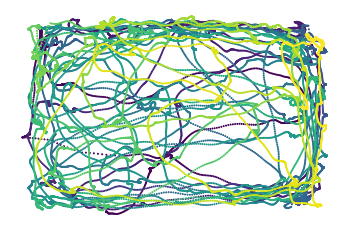

In [65]:
figx = pkl.load(  open('FigureObject.pickle',  'rb')  )
figx

In [71]:
data= figx.axes[0].subplots[0].get_data()

AttributeError: ignored

In [69]:
data